In [1]:
%matplotlib inline

# Decision Tree

In [2]:
from time import time
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [3]:
X_raw = np.load('./data/images.npy')
y_raw = np.load('./data/labels.npy')
y_train = y_raw[0:3900]
y_test = y_raw[4875:6500]

print("X_train original shape:", X_raw.shape)
print("y_train original shape:", y_raw.shape)

X_train original shape: (6500, 28, 28)
y_train original shape: (6500,)


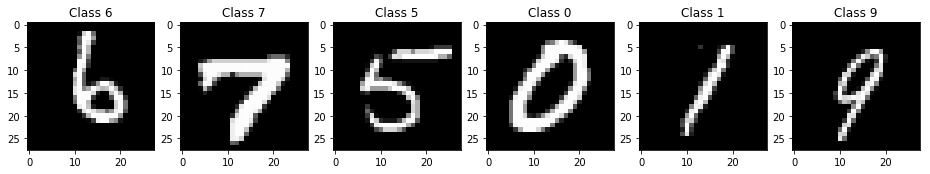

In [4]:
num_figures = 6
plt.figure(figsize=(16,8))
for i in range(num_figures):
    plt.subplot(1,num_figures,i+1)
    plt.imshow(X_raw[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_raw[i]))

In [5]:
X_train = X_raw[0:3900].reshape(3900, 784)
X_valid = X_raw[3900:4875].reshape(975, 784)
X_test = X_raw[4875:6500].reshape(1625, 784)

X_train = X_train.astype('float32')
X_valid = X_valid.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_valid /= 255
X_test /= 255
print("Training matrix shape", X_train.shape)
print("Validation matrix shape", X_valid.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (3900, 784)
Validation matrix shape (975, 784)
Testing matrix shape (1625, 784)


In [6]:
t0 = time()
clf_dt = DecisionTreeClassifier()
print(clf_dt.fit(X_train.reshape(-1,28*28), y_train))
print('Time elapsed: %.2fs' % (time()-t0))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Time elapsed: 0.37s


In [7]:
pred_dt = clf_dt.predict(X_test.reshape(-1,28*28))
print('Predicted', len(pred_dt), 'digits with accuracy:', accuracy_score(y_test, pred_dt))

Predicted 1625 digits with accuracy: 0.7766153846153846


In [8]:
t0 = time()
clf_rf = RandomForestClassifier()
print(clf_rf.fit(X_train.reshape(-1,28*28), y_train))
print('Time elapsed: %.2fs' % (time()-t0))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Time elapsed: 0.11s


In [9]:
pred_rf = clf_rf.predict(X_test.reshape(-1,28*28))
print('Predicted', len(pred_rf), 'digits with accuracy:', accuracy_score(y_test, pred_rf))

Predicted 1625 digits with accuracy: 0.9009230769230769


In [10]:
correct_indices = np.nonzero(pred_rf == y_test)[0]
incorrect_indices = np.nonzero(pred_rf != y_test)[0]

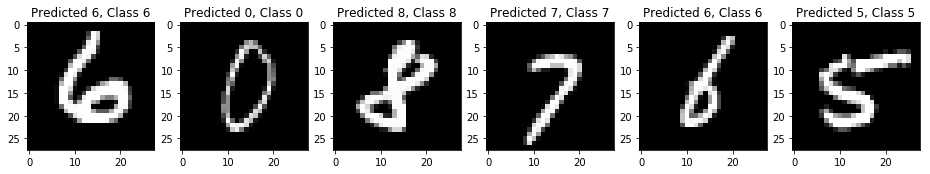

In [11]:
num_figures = 6
plt.figure(figsize=(16,8))
for i, correct in enumerate(correct_indices[:num_figures]):
    plt.subplot(1,num_figures,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(pred_rf[correct], y_test[correct]))

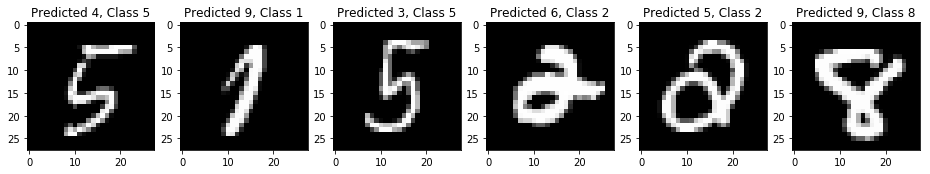

In [12]:
num_figures = 6
plt.figure(figsize=(16,8))
for i, incorrect in enumerate(incorrect_indices[:num_figures]):
    plt.subplot(1,num_figures,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(pred_rf[incorrect], y_test[incorrect]))